In [23]:
import pickle
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
files = ['Noisy/' + x for x in os.listdir('Noisy')]

In [5]:
files
X_all = []
Y_all = []

In [15]:
for file in files:
    with open(file, 'rb') as f:
        data = pickle.load(f)

    X, Y = data['X'], data['Y']
    X_all.append(X)
    Y_all.append(Y)

The below two functions are from the paper author, sourced [here](https://github.com/rflamary/AstroImageReconsCNN/blob/master/dsutils.py). I have no idea how/why/if they work. I'm trusting the author.

In [18]:
def get_sample(I,Ip,sz,szp):
    """
    geta  random sample (small image from I of size sz*sz and its corresponding 
    smaller image from Ip of size szp*szp)
    """
    i=np.random.randint(0,I.shape[0]-sz)
    j=np.random.randint(0,I.shape[1]-sz)
    delt=int(np.ceil((sz-szp)*1.0/2))
    if szp==1:
        y=Ip[i+delt,j+delt]
    else:
        y=Ip[i+delt:i+sz-delt,j+delt:j+sz-delt]
    return I[i:i+sz,j:j+sz],y

In [19]:
def get_data_multi(I,Ip,sz,szp,n):
    """
    Gets random image crop pairs of given sizes
    
    Args:
    I: The list of input images (X_all). This should have shape (n_images, img_shape...)
    Ip: The list of output images (Y_all).
    sz: The size of the input image crops required
    szp: The size of the output image crops required
    n: The number of crop pairs required.
    """
    nbi=len(I)
    xapp=np.zeros((n,1,sz,sz))
    xtest=np.zeros((n,1,szp,szp))
    for i in range(n):
        im=np.random.randint(0,nbi)
        xapp[i,:,:,:],xtest[i,:,:,:]=get_sample(I[im],Ip[im],sz,szp)
    return xapp,xtest 

In [20]:
X_crops, Y_crops = get_data_multi(X_all, Y_all, 32, 14, 5)

In [21]:
X_crops.shape

(5, 1, 32, 32)

In [22]:
Y_crops.shape

(5, 1, 14, 14)

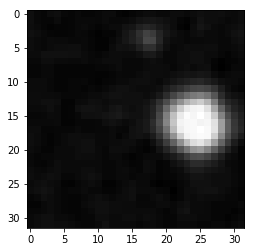

In [27]:
plt.imshow(X_crops[0][0], cmap='gray')

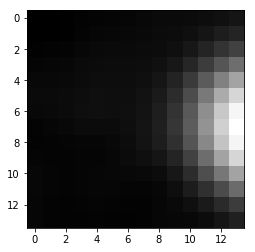

In [26]:
plt.imshow(Y_crops[0][0], cmap='gray');